# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [1]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cd /content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn

/content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn


In [2]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [3]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [5]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
newdf.head(5)

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [8]:
newdf.describe()

,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

<Axes: >

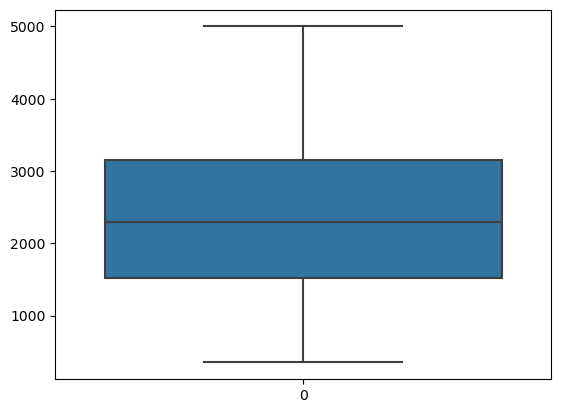

In [9]:
#Code for 'price' field
sns.boxplot(newdf['price'])

<Axes: >

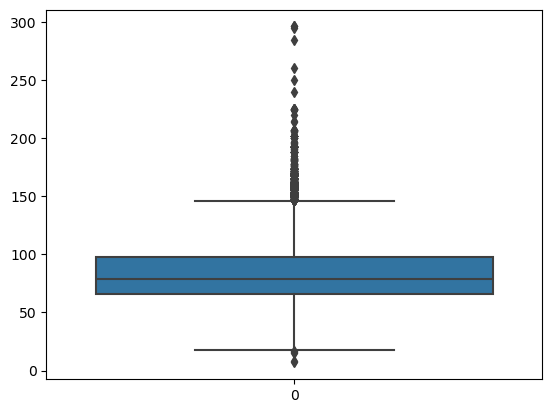

In [10]:
#Code for 'square' field
sns.boxplot(newdf['square'])

<Axes: >

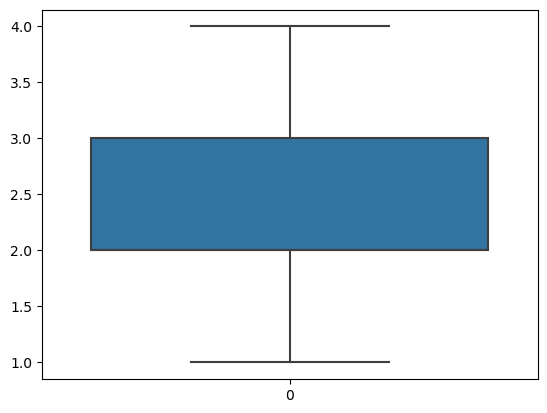

In [12]:
#Code for 'bedrooms' field
sns.boxplot(newdf['bedrooms'])

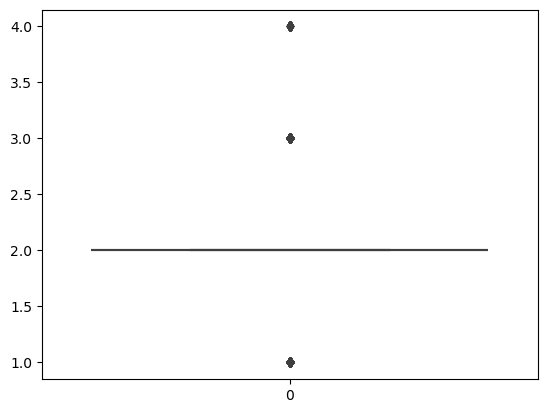

In [14]:
#Code for 'bathrooms' field
sns.boxplot(newdf['bathrooms']);

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27192\1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


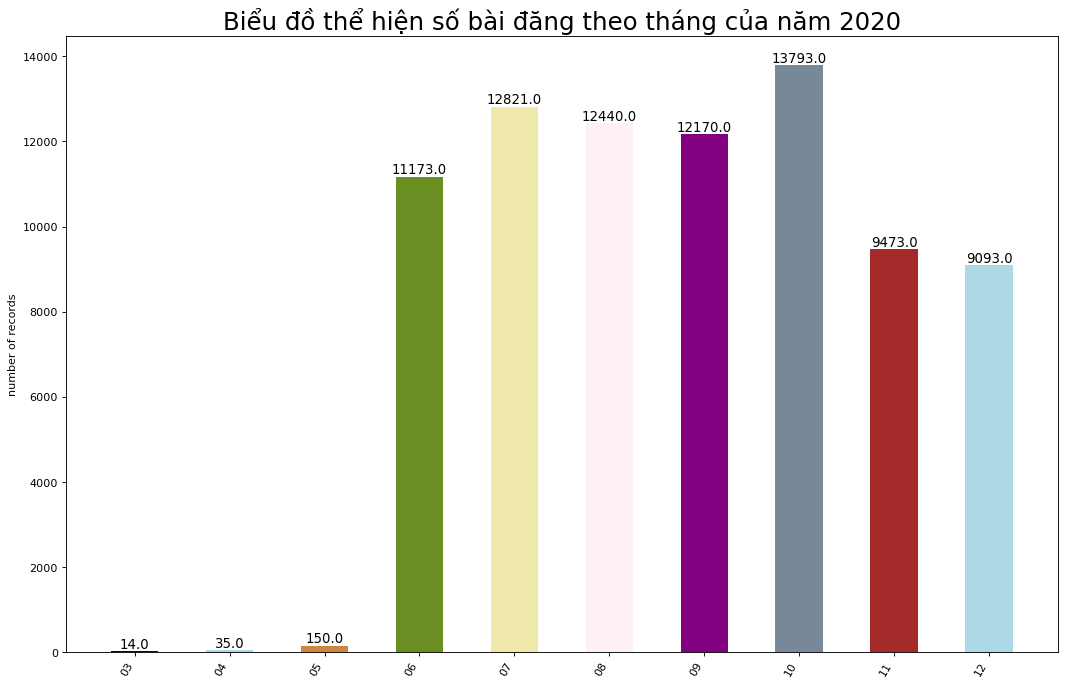

In [21]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

In [18]:
df2 = newdf.groupby('month')['price'].mean().reset_index(name='mean price')

In [28]:
df2['mean price'] = df2['mean price'].round(2)

In [29]:
df2

,month,mean price
0,03,1997.07
1,04,1844.83
2,05,2165.09
3,06,2332.94
4,07,2355.89
5,08,2380.93
6,09,2389.15
7,10,2425.98
8,11,2481.79
9,12,2509.59


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27192\1053519716.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment= 'right')


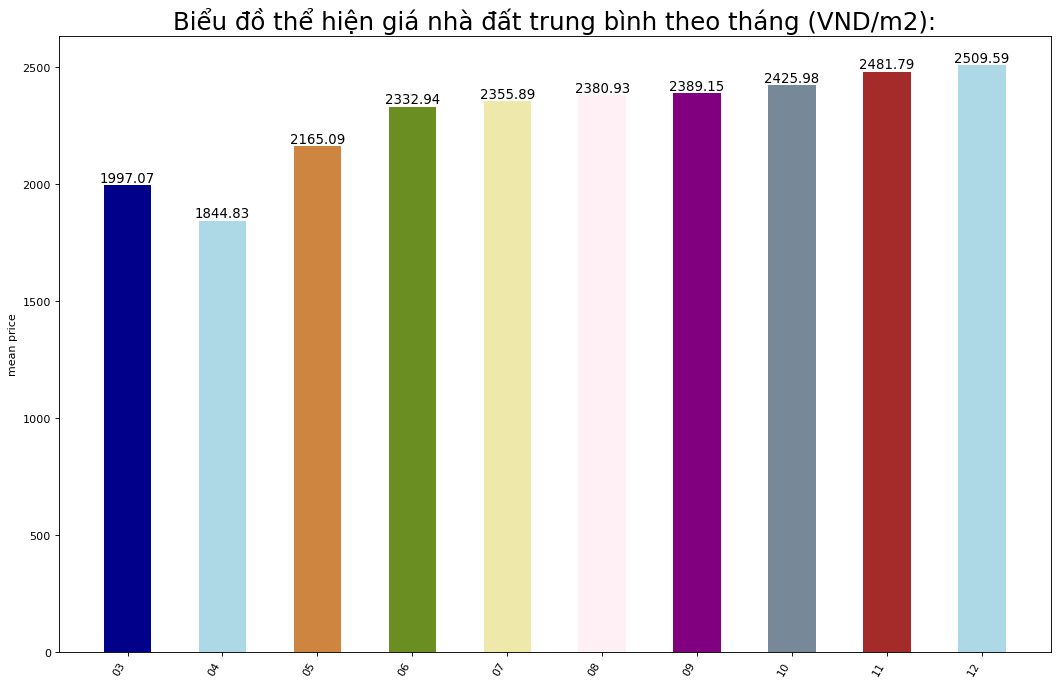

In [30]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['month'], df2['mean price'], color=c, width=.5)
for i, val in enumerate(df2['mean price'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2):", fontsize=22)
plt.ylabel('mean price')
plt.show()

* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

In [58]:
df34 = newdf.loc[newdf['month']=='04']
df312 = newdf.loc[newdf['month']=='12']

In [59]:
df34.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
60585,25281762,04,NaN,NaN,77.0,3.0,2.0,Đông-Bắc,Tây-Nam,hoang mai,hoang liet,1850.0
61228,25268074,04,C37 Bộ Công An - Bắc Hà Tower,Công ty CP Xây dựng và Thương mại Bắc Hà,112.0,3.0,2.0,Đông-Nam,Tây-Bắc,nam tu liem,NaN,2688.0
61660,19276323,04,Khu đô thị mới Cổ Nhuế,Công ty CP Tập đoàn Nam Cường Hà Nội,150.0,3.0,3.0,NaN,NaN,bac tu liem,co nhue 1,3300.0
61960,21153832,04,NaN,NaN,33.0,1.0,1.0,NaN,NaN,nam tu liem,my dinh 2,660.0
63490,25200128,04,NaN,NaN,55.0,2.0,1.0,Bắc,Nam,cau giay,mai dich,1260.0


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


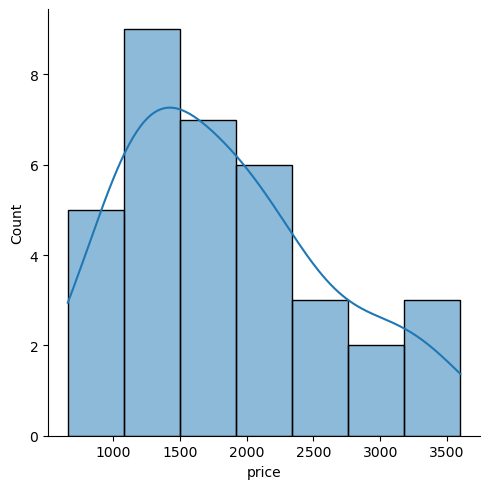

In [64]:
sns.displot(x=df34['price'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


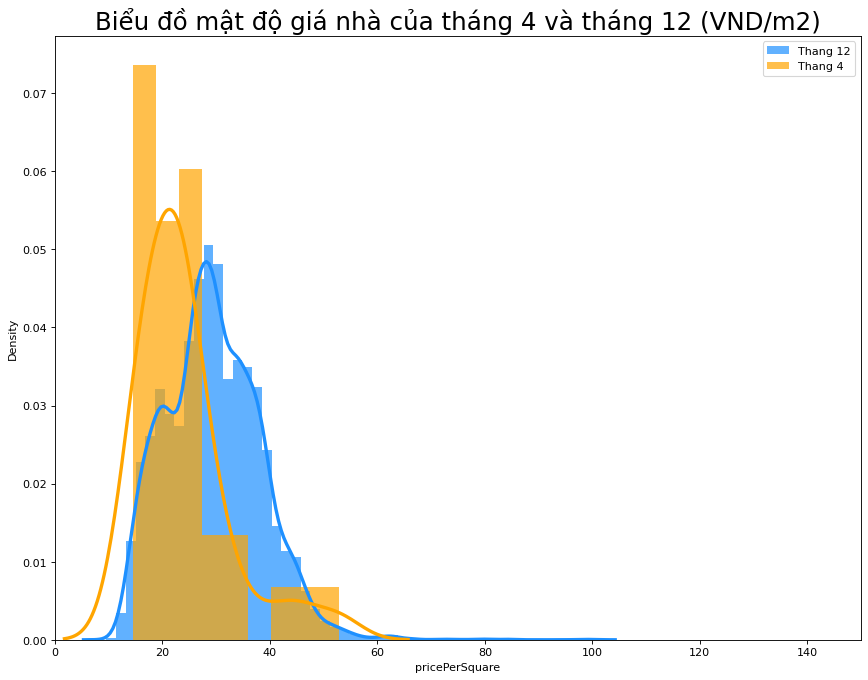

In [ ]:
sns.displot(df34['price'])


* Số lượng bất động sản phân theo số lượng bedrooms

In [32]:
df4 = newdf.groupby('bedrooms').size().reset_index(name='count')
df4

,bedrooms,count
0,1.0,4158
1,2.0,45317
2,3.0,29543
3,4.0,2144


* Giá bất động sản trung bình theo số lượng bedrooms

In [33]:
df5 = newdf.groupby('bedrooms')['price'].mean().reset_index(name='mean price')
df5

,bedrooms,mean price
0,1.0,1342.610974
1,2.0,2019.564821
2,3.0,3037.271291
3,4.0,3890.328032


* Giá nhà đất trung bình theo quận (VND/m2)

In [35]:
df6=newdf.groupby('district')['price'].mean().reset_index(name='mean price')
df6

,district,mean price
0,ba dinh,3335.350456
1,bac tu liem,3041.182833
2,cau giay,3033.774841
3,chuong my,687.321176
4,dan phuong,1117.530702
5,dong anh,1415.668997
6,dong da,2693.787442
7,gia lam,1698.436365
8,ha dong,1635.687684
9,hai ba trung,3227.851373


* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

In [ ]:
df7 = newdf.loc[newdf['district']=='hoan kiem']

In [38]:
df7s = df7.groupby('ward')['price'].mean().reset_index(name='mean price')
df7s

,ward,mean price
0,chuong duong,1233.333333
1,cua dong,2150.000000
2,cua nam,3145.000000
3,dong xuan,2200.000000
4,hang bai,3725.000000
5,hang bo,2300.000000
6,hang buom,2050.000000
7,hang ma,2100.000000
8,ly thai to,1450.000000
9,phan chu trinh,2475.000000


* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [40]:
df8 = newdf.groupby('investor')['price'].mean().reset_index(name='mean price')
df8

,investor,mean price
0,Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng,1787.000000
1,C.T Group,2157.312500
2,Công TNHH Bắc Chương Dương,2831.392157
3,Công Ty CP Đầu Tư Xây Dựng Và Địa Ốc An Việt ...,2366.666667
4,Công ty Booyoung,2491.666924
...,...,...
257,Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần,3670.877863
258,Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...,2945.305281
259,Tổng công ty đầu tư phát triển nhà và đô thị B...,2655.010549
260,Vimefulland,1815.000000


* Giá nhà đất trung bình theo dự án (VND/m2)

In [42]:
df9 = newdf.groupby('project')['price'].mean().reset_index(name='mean price')
df9

,project,mean price
0,6th Element,3354.803676
1,A10-A14 Nam Trung Yên,2351.074000
2,AQH Riverside,1564.666667
3,AZ Lâm Viên Complex,3396.666667
4,Amber Riverside,2953.636364
...,...,...
615,Xuân Phương Garden,1953.000000
616,Xuân Phương Residence,1888.706061
617,Xuân Phương Tasco,2166.142105
618,Yên Hòa Condominium,2284.333333


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

In [ ]:
# Code ở đây

* Giá bất động sản phân bố theo dự án

In [ ]:
# Code ở đây

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [43]:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [ ]:
# Code ở đây

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

In [ ]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)


* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

In [ ]:
#Gợi ý: sns.pairplot(kind='scatter', ...)



4. Mật độ giá nhà trung bình theo quận 

In [ ]:
#Gợi ý: sns.displot()


End :))